# TFM. Modelo predictivo llamadas Call Center
## Notebook 4 - Modelos de regresión

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Carga de datos

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
df_data.head()

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,envioslag1,envioslag6,envioslag7,envioslag8,envios,sinlag1,coslag1,sinlag2,coslag2,sinlag3,coslag3,sinlag4,coslag4,sinlag5,coslag5,sinlag6,coslag6,sinlag7,coslag7,llamadaslag1,llamadaslag2,llamadaslag3,llamadaslag4,llamadaslag5,llamadaslag6,llamadaslag7,llamadas
0,2019-01-14,1.0,0.0,0.0,0.0,0.0,23.0,3220.0,1408.0,1923.0,3237.0,3.921346e-15,1.0,-1.960673e-15,-1.0,8.660254e-01,-0.5,1.000000e+00,-9.803364e-16,-5.877853e-01,-0.809017,8.660254e-01,0.5,-7.818315e-01,0.623490,270.0,236.0,227.0,174.0,173.0,351.0,283.0,260.0
1,2019-01-15,0.0,1.0,0.0,0.0,0.0,3237.0,4595.0,3220.0,1408.0,2911.0,-3.429011e-15,1.0,-1.714506e-15,1.0,-8.660254e-01,-0.5,8.572528e-16,-1.000000e+00,-9.510565e-01,0.309017,8.660254e-01,-0.5,-4.898587e-16,1.000000,260.0,270.0,236.0,227.0,174.0,173.0,351.0,259.0
2,2019-01-16,0.0,0.0,1.0,0.0,0.0,2911.0,2924.0,4595.0,3220.0,2639.0,-1.077937e-14,1.0,5.389684e-15,-1.0,-4.777360e-15,1.0,-1.000000e+00,-2.694842e-15,-7.347881e-16,1.000000,2.388680e-15,-1.0,7.818315e-01,0.623490,259.0,260.0,270.0,236.0,227.0,174.0,173.0,227.0
3,2019-01-17,0.0,0.0,0.0,1.0,0.0,2639.0,289.0,2924.0,4595.0,2056.0,-3.918870e-15,1.0,-1.959435e-15,1.0,8.660254e-01,-0.5,-9.797174e-16,1.000000e+00,9.510565e-01,0.309017,-8.660254e-01,-0.5,9.749279e-01,-0.222521,227.0,259.0,260.0,270.0,236.0,227.0,174.0,142.0
4,2019-01-18,0.0,0.0,0.0,0.0,1.0,2056.0,2461.0,289.0,2924.0,2005.0,2.941628e-15,1.0,-1.470814e-15,-1.0,-8.660254e-01,-0.5,1.000000e+00,-7.354071e-16,5.877853e-01,-0.809017,-8.660254e-01,0.5,4.338837e-01,-0.900969,142.0,227.0,259.0,260.0,270.0,236.0,227.0,277.0


# Tratamiento de la serie temporal con ML

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
X = df_data.iloc[:,1:-1]
y = df_data['llamadas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
result = pd.DataFrame()
result['y_test'] = y_test

## Regresión Lineal

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Regresor
regl = LinearRegression()

In [9]:
X.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'envioslag1',
       'envioslag6', 'envioslag7', 'envioslag8', 'envios', 'sinlag1',
       'coslag1', 'sinlag2', 'coslag2', 'sinlag3', 'coslag3', 'sinlag4',
       'coslag4', 'sinlag5', 'coslag5', 'sinlag6', 'coslag6', 'sinlag7',
       'coslag7', 'llamadaslag1', 'llamadaslag2', 'llamadaslag3',
       'llamadaslag4', 'llamadaslag5', 'llamadaslag6', 'llamadaslag7'],
      dtype='object')

In [10]:
regl.fit(X_train, y_train)

LinearRegression()

In [11]:
pred_regl = regl.predict(X_test)

### Resultados regresión lineal

In [12]:
rmse_regl = mean_squared_error(y_test, pred_regl, squared=False)
print(rmse_regl)

43.19567592586164


In [13]:
result['pred_regl'] = pred_regl

In [14]:
result['error_regl'] = result['y_test'] - result['pred_regl']

In [15]:
result.head()

,y_test,pred_regl,error_regl
538,137.0,92.182068,44.817932
541,116.0,131.697754,-15.697754
525,116.0,152.413330,-36.413330
475,212.0,172.148071,39.851929
214,234.0,226.126038,7.873962


<AxesSubplot:>

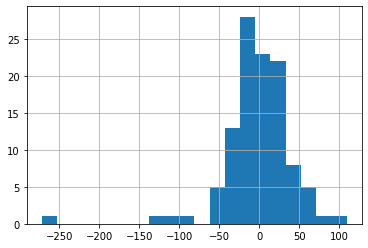

In [16]:
result['error_regl'].hist(bins=20)

In [17]:
result['error_regl'].describe()

count    110.000000
mean      -2.110839
std       43.341527
min     -271.522400
25%      -20.023865
50%       -1.406586
75%       20.160156
max      109.221680
Name: error_regl, dtype: float64

#### Representar modelo de predicción

In [18]:
analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['llamadas']

analisisPre = regl.predict(X)
analisisPre = pd.DataFrame(analisisPre)

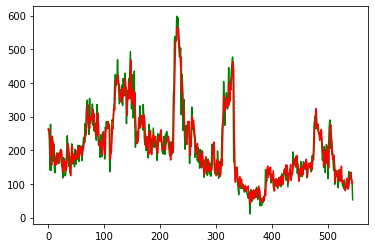

In [19]:
plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')

## K-vecinos

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#### Buscamos el mejor ajuste del modelo de K-vecinos

In [21]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(1,50)})

In [22]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 10}, -0.7811210739022725)

In [24]:
# Regresor
regk = KNeighborsRegressor(n_neighbors=10)

In [25]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [26]:
pred_regk = regk.predict(X_test)

### Resultados K-vecinos

In [27]:
rmse_regk = mean_squared_error(y_test, pred_regk, squared=False)
print(rmse_regk)

86.40376149219432


In [28]:
result['pred_regk'] = pred_regk

In [29]:
result['error_regk'] = result['y_test'] - result['pred_regk']

In [30]:
result.head()

,y_test,pred_regl,error_regl,pred_regk,error_regk
538,137.0,92.182068,44.817932,158.5,-21.5
541,116.0,131.697754,-15.697754,152.7,-36.7
525,116.0,152.413330,-36.413330,236.0,-120.0
475,212.0,172.148071,39.851929,250.1,-38.1
214,234.0,226.126038,7.873962,213.7,20.3


<AxesSubplot:>

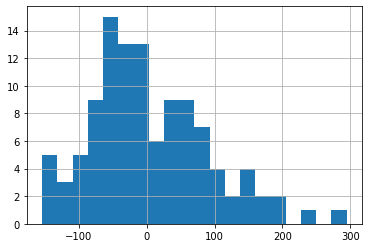

In [31]:
result['error_regk'].hist(bins=20)

In [32]:
result['error_regk'].describe()

count    110.000000
mean       3.845455
std       86.713198
min     -154.000000
25%      -56.950000
50%       -9.350000
75%       58.200000
max      294.400000
Name: error_regk, dtype: float64

#### Representar modelo de predicción

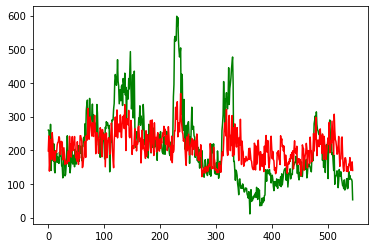

In [33]:
analisisPre = regk.predict(X)
analisisPre = pd.DataFrame(analisisPre)

plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')